주차별 평균으로 discontinuity 확인

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
#customized preprocessing pkg
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import lib.stats.stats as st
import config.config as conf

### 소스코드 complexity 계산

In [3]:
input_year_list = [ '2023', '2024']
year_range = '2324'

In [4]:
input_pl = 'python'

In [5]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/complexity_{input_pl}_df_{input_year}_{year_range}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [ ]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2022-12-05
2024-12-01


In [8]:
complexity_python_df

,id,cdate,title,body
0,75072182,2023-01-10,How can I access all PyMol commands through a ...,<p>Currently trying to use a Python script to ...
1,75072191,2023-01-10,Why does my string doesn't get modified to one...,"<p>I have a number 'n' (n=60, for example), my..."
2,75072200,2023-01-10,How to create a column based on the value of t...,<p>I have the following dataframe</p>\n<pre><c...
3,75072207,2023-01-10,Why does read_csv give me a timezone warning?,<p>I try reading a CSV file using pandas and g...
4,75072229,2023-01-10,How to use hash function in Python3 to transfo...,<p>I have a large number of different sentence...
...,...,...,...,...
58754,79241472,2024-12-01,Why does closing a client socket connection ra...,<p>It seems that the epoll system will raise a...
58755,79241502,2024-12-01,Python error trying to install gensim on MacOS,<p>trying to install gensim on MacBook Pro (i7...
58756,79241507,2024-12-01,"Quickfix Unable to receive 35=8, message",<p>I am struggling with getting the execution ...
58757,79241525,2024-12-01,ModuleNotFoundError in a venv,"<pre class=""lang-none prettyprint-override""><c..."


In [10]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/calc_com_df_{input_year}_{input_pl}_{year_range}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [11]:
calc_com_df.reset_index(drop=True, inplace=True)

In [12]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,38173_77388248.py,38173_77388248.py,0
1,41365_77332287.py,41365_77332287.py,1
2,80506_76638091.py,80506_76638091.py,0
3,73019_76749980.py,73019_76749980.py,0
4,117423_76013942.py,117423_76013942.py,0


In [13]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [14]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [15]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
25373,0_75072182.py,0_75072182.py,0,0,75072182
96501,0_79238668.py,0_79238668.py,0,0,79238668
26655,10_75072264.py,10_75072264.py,0,10,75072264
92252,10_79241946.py,10_79241946.py,0,10,79241946
43544,100_75065792.py,100_75065792.py,0,100,75065792
...,...,...,...,...,...
10487,99993_76302036.py,99993_76302036.py,6,99993,76302036
24497,99996_76302036.py,99996_76302036.py,0,99996,76302036
49612,99997_76302036.py,99997_76302036.py,0,99997,76302036
70352,99998_76302038.py,99998_76302038.py,3,99998,76302038


In [16]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [17]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134199 entries, 0 to 134198
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  134199 non-null  object
 1   File Name             134199 non-null  object
 2   Cognitive Complexity  134199 non-null  int64 
 3   idx                   134199 non-null  int64 
 4   id                    134199 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.1+ MB


In [18]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [19]:
calc_com_df.head()

,id,cdate,Path,File Name,Cognitive Complexity,idx
0,75072182,2023-01-10,0_75072182.py,0_75072182.py,0,0
1,75072207,2023-01-10,6_75072207.py,6_75072207.py,0,6
2,75072264,2023-01-10,10_75072264.py,10_75072264.py,0,10
3,75072264,2023-01-10,9_75072264.py,9_75072264.py,0,9
4,75072264,2023-01-10,8_75072264.py,8_75072264.py,0,8


In [20]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [21]:
# calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [23]:
calc_ed_com_df

,id,cdate,Path,File Name,Cognitive Complexity,idx
0,75072182,2023-01-10,0_75072182.py,0_75072182.py,0,0
1,75072207,2023-01-10,6_75072207.py,6_75072207.py,0,6
2,75072264,2023-01-10,10_75072264.py,10_75072264.py,0,10
3,75072264,2023-01-10,9_75072264.py,9_75072264.py,0,9
4,75072264,2023-01-10,8_75072264.py,8_75072264.py,0,8
...,...,...,...,...,...,...
134194,79241313,2024-12-01,86314_79241313.py,86314_79241313.py,0,86314
134195,79241406,2024-12-01,86315_79241406.py,86315_79241406.py,0,86315
134196,79241406,2024-12-01,86316_79241406.py,86316_79241406.py,0,86316
134197,79241472,2024-12-01,86317_79241472.py,86317_79241472.py,0,86317


In [24]:
calc_ed_com_df

,id,cdate,Path,File Name,Cognitive Complexity,idx
0,75072182,2023-01-10,0_75072182.py,0_75072182.py,0,0
1,75072207,2023-01-10,6_75072207.py,6_75072207.py,0,6
2,75072264,2023-01-10,10_75072264.py,10_75072264.py,0,10
3,75072264,2023-01-10,9_75072264.py,9_75072264.py,0,9
4,75072264,2023-01-10,8_75072264.py,8_75072264.py,0,8
...,...,...,...,...,...,...
134194,79241313,2024-12-01,86314_79241313.py,86314_79241313.py,0,86314
134195,79241406,2024-12-01,86315_79241406.py,86315_79241406.py,0,86315
134196,79241406,2024-12-01,86316_79241406.py,86316_79241406.py,0,86316
134197,79241472,2024-12-01,86317_79241472.py,86317_79241472.py,0,86317


In [34]:
calc_ed_com_df['rel_week'] = np.floor((pd.to_datetime(calc_ed_com_df['cdate'])- datetime.datetime(2023,12,1)).dt.days/7)


In [35]:
calc_ed_com_df[(calc_ed_com_df['rel_week']>=-52)&(calc_ed_com_df['rel_week']<52)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 134050 entries, 0 to 134149
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    134050 non-null  int64  
 1   cdate                 134050 non-null  object 
 2   Path                  134050 non-null  object 
 3   File Name             134050 non-null  object 
 4   Cognitive Complexity  134050 non-null  int64  
 5   idx                   134050 non-null  int64  
 6   rel_week              134050 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 8.2+ MB


In [36]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['rel_week']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [37]:
calc_ed_com_mean_df.head()

,rel_week,id,Cognitive Complexity,idx
0,-52.0,7.471027e+07,1.187747,25485.588439
1,-51.0,7.477763e+07,1.023021,20542.767581
2,-50.0,7.485575e+07,0.946623,15442.739651
3,-49.0,7.492684e+07,1.006454,10245.636403
4,-48.0,7.499095e+07,0.972148,5598.999618


In [38]:
chow_df = calc_ed_com_mean_df[['rel_week', 'Cognitive Complexity']]

In [39]:
chow_df = chow_df[(chow_df['rel_week']>=-52)&(chow_df['rel_week']<52)]

In [40]:
x = chow_df['rel_week'].values

In [41]:
np.argmax(np.where(x <= 0)) 

52

In [42]:
chow_df_1year = chow_df[chow_df['rel_week']>=-52]
st_chow_1year = st.Stats(chow_df_1year['rel_week'].values, chow_df_1year['Cognitive Complexity'].values, 2, 0.95)
F_stat_1, p_value_1 = st_chow_1year.chow_test()


In [43]:
np.argmax(np.where(x < 0))

51

In [44]:
x[:51]

array([-52., -51., -50., -49., -48., -47., -46., -45., -44., -43., -42.,
       -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
       -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.])

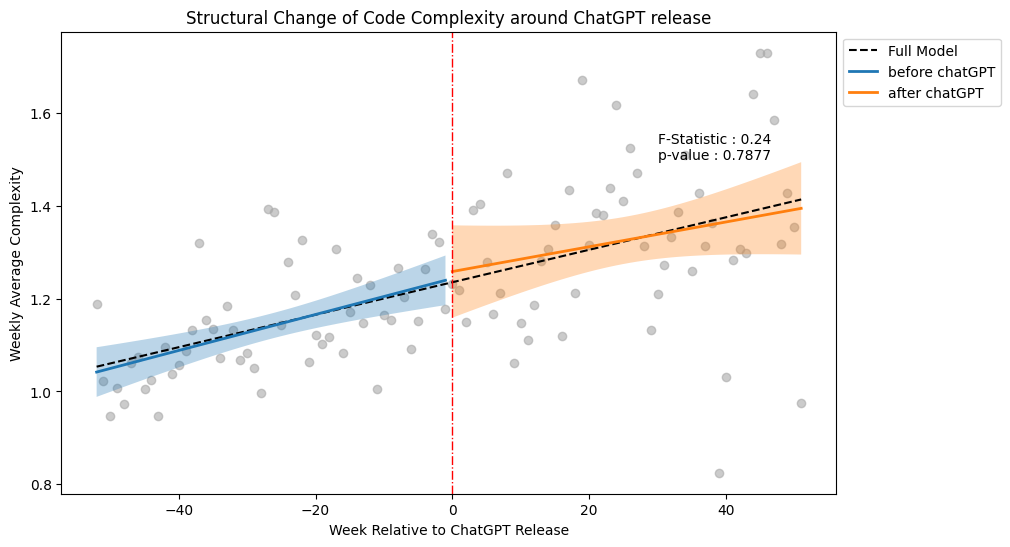

In [45]:
x = chow_df_1year['rel_week'].values
y = chow_df_1year['Cognitive Complexity'].values

split_idx = np.argmax(np.where(x < 0))+1
x1= x[:split_idx]
x2= x[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y,  alpha=0.6, color='darkgray')
plt.plot(x, st_chow_1year.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x1, st_chow_1year.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x1, st_chow_1year.y1_predict - st_chow_1year.y1_conf_interval, st_chow_1year.y1_predict + st_chow_1year.y1_conf_interval, alpha=0.3)

plt.plot(x2, st_chow_1year.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x2, st_chow_1year.y2_predict - st_chow_1year.y2_conf_interval, st_chow_1year.y2_predict + st_chow_1year.y2_conf_interval, alpha=0.3)

plt.text(30, 1.5, s=f'F-Statistic : {F_stat_1:.2f}\np-value : {p_value_1:.4f}', fontsize = 10) #
plt.axvline(x=0,     color='red',    linestyle='-.', linewidth=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')
plt.title(f"Structural Change of Code Complexity around ChatGPT release")
plt.xlabel("Week Relative to ChatGPT Release")
plt.ylabel("Weekly Average Complexity")
plt.savefig("complexity_chow_ver3.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화
plt.show()


In [43]:
plt.savefig("complexity_chow_ver3.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화

<Figure size 640x480 with 0 Axes>

In [38]:

with open(f'{conf.DATA_PATH}/data/cc_python_chow_df.pkl', 'wb') as f:
    pickle.dump(chow_df, f)

In [39]:
chow_df.head()

,rel_week,Cognitive Complexity
48,-52.0,1.087470
49,-51.0,0.974254
50,-50.0,1.023590
51,-49.0,1.026398
52,-48.0,0.982172
